In [46]:
### Libraries for Machine Learning
import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import glob
import os
import warnings
import mplcyberpunk

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, accuracy_score
from statsmodels.stats import anova
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR



from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.exceptions import ConvergenceWarning
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, accuracy_score
from statsmodels.stats import anova
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.svm import SVR
from IPython.display import display, HTML
import itertools

# Suppress warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning, message="The SAMME.R algorithm.*")


In [3]:
# Get a list of all CSV files in the folder
csv_files = glob.glob("*.csv")

# Load each CSV file, adding a 'filename' column, and store them in a list
dataframes = []
for file in csv_files:
    df = pd.read_csv(file)
    df["filename"] = os.path.basename(file)  # Add filename column
    dataframes.append(df)

# Concatenate all dataframes into one
har70_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows
print(har70_df.head())


                 timestamp    back_x    back_y    back_z   thigh_x   thigh_y  \
0  2021-03-24 14:42:03.839 -0.999023 -0.063477  0.140625 -0.980469 -0.112061   
1  2021-03-24 14:42:03.859 -0.980225 -0.079346  0.140625 -0.961182 -0.121582   
2  2021-03-24 14:42:03.880 -0.950195 -0.076416  0.140625 -0.949463 -0.080566   
3  2021-03-24 14:42:03.900 -0.954834 -0.059082  0.140381 -0.957520 -0.046143   
4  2021-03-24 14:42:03.920 -0.972412 -0.042969  0.142822 -0.977051 -0.023682   

    thigh_z  label filename  
0 -0.048096      6  501.csv  
1 -0.051758      6  501.csv  
2 -0.067139      6  501.csv  
3 -0.050781      6  501.csv  
4 -0.026611      6  501.csv  


In [4]:
har70_df.dtypes

timestamp     object
back_x       float64
back_y       float64
back_z       float64
thigh_x      float64
thigh_y      float64
thigh_z      float64
label          int64
filename      object
dtype: object

In [5]:
#make a copy of the raw data so that we can go back and refer to it later
har70 = har70_df.copy()

In [6]:
har70['timestamp']=pd.to_datetime(har70['timestamp'])

In [7]:
har70.describe()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,2259597,2.259597e+06,2.259597e+06,2.259597e+06,2.259597e+06,2.259597e+06,2.259597e+06,2.259597e+06
mean,2021-05-02 09:36:36.616267264,-8.699344e-01,-3.316850e-02,2.342491e-02,-6.796213e-01,2.774742e-03,-3.841220e-01,3.911567e+00
min,2021-03-24 14:42:03.839000,-4.333252e+00,-2.031006e+00,-2.204834e+00,-7.942139e+00,-5.142578e+00,-7.593750e+00,1.000000e+00
25%,2021-04-13 15:03:39.180000,-9.929200e-01,-1.096190e-01,-2.751460e-01,-9.873050e-01,-1.166990e-01,-9.860840e-01,1.000000e+00
50%,2021-05-07 08:32:19.208999936,-9.392090e-01,-2.172900e-02,-1.125490e-01,-9.357910e-01,-1.562500e-02,-1.877440e-01,3.000000e+00
75%,2021-05-27 09:33:48.659000064,-8.281250e-01,5.078100e-02,3.125000e-01,-7.055700e-02,1.123050e-01,-4.150000e-03,7.000000e+00
max,2021-06-11 11:13:14.178000,3.630370e-01,1.576660e+00,1.179199e+00,3.395264e+00,5.725098e+00,3.953369e+00,8.000000e+00
std,NaN,2.689122e-01,1.513270e-01,4.327357e-01,5.517539e-01,2.736956e-01,5.127760e-01,2.902911e+00


<Axes: >

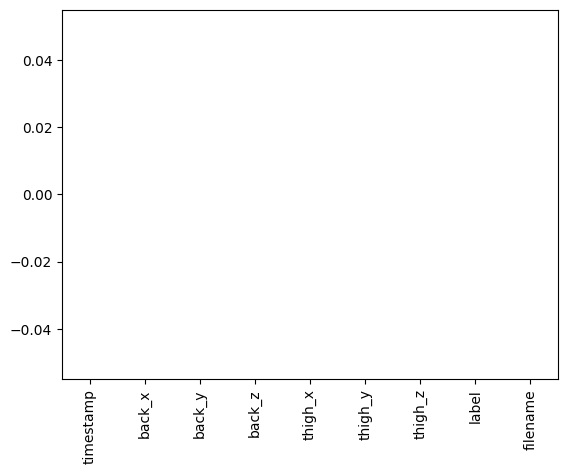

In [8]:
har70.isna().sum().plot.bar()

<Axes: xlabel='timestamp'>

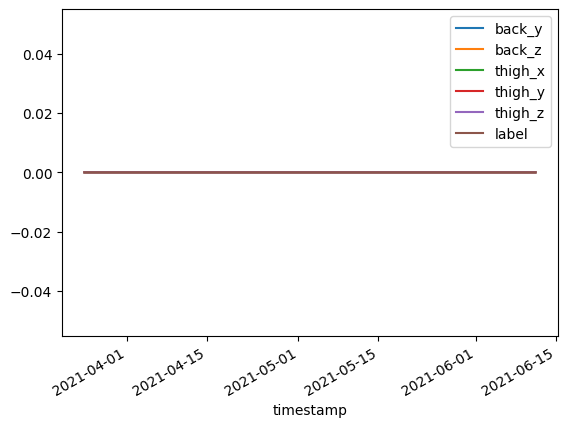

In [9]:
har70_na = har70.drop('timestamp', axis = 1).isna().groupby(har70.timestamp, sort = False).sum().reset_index()
har70_na.plot(x='timestamp', y=har70_na.columns[2:-1])


array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>], dtype=object)

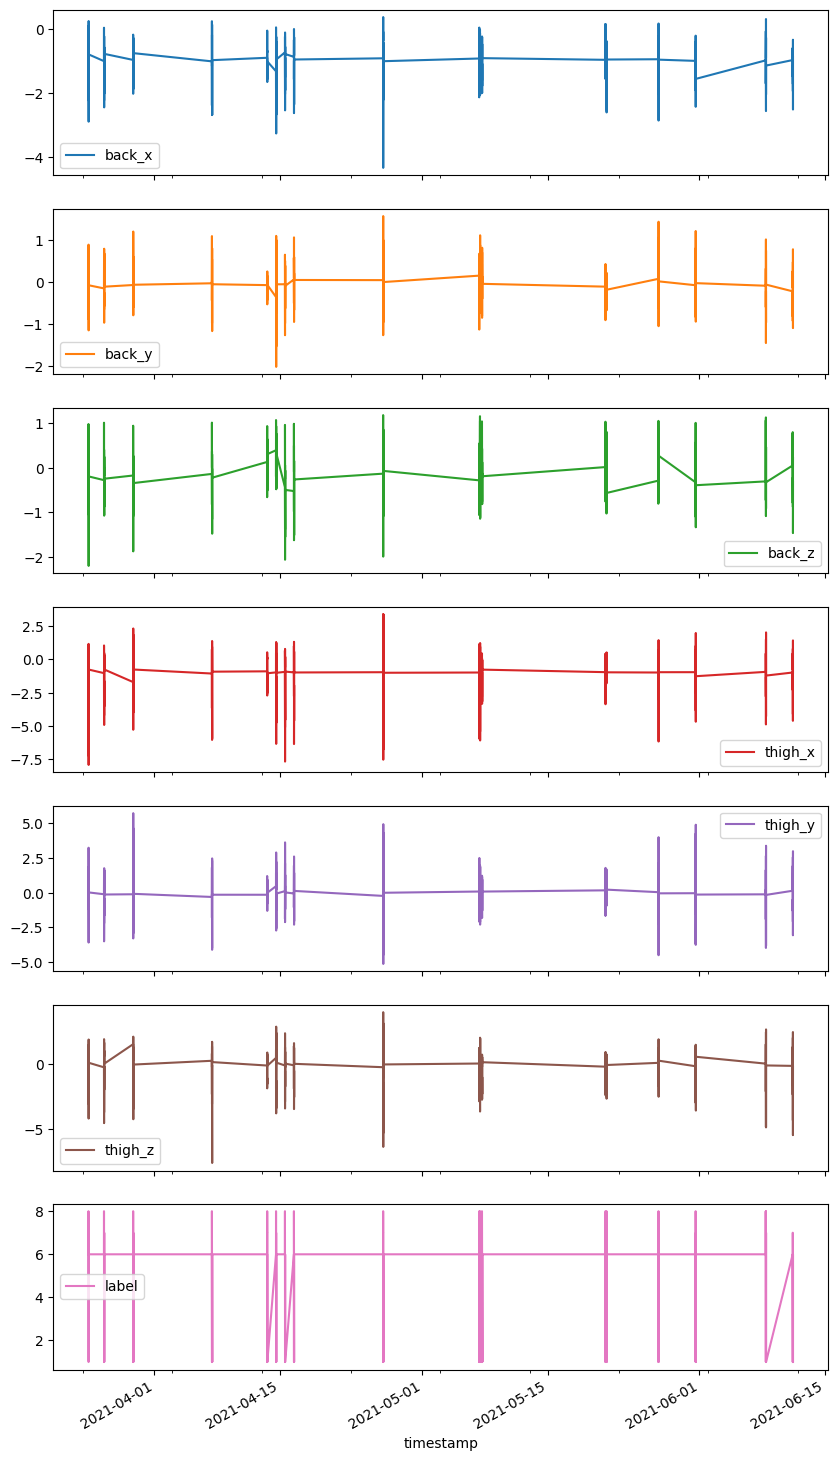

In [10]:
#build your line chart here
# IRO - Plotting the first 4 variables using Date as our X axis:
har70.plot('timestamp', ['back_x', 'back_y', 'back_z', 'thigh_x','thigh_y','thigh_z', 'label'], subplots = True,figsize = [10,20])

In [11]:
from pandas.plotting import scatter_matrix
def add_regression(ax, x, y):
    slope, intercept = np.polyfit(x, y, 1)  # Linear regression
    x_vals = np.linspace(x.min(), x.max(), 100)
    y_vals = slope * x_vals + intercept
    ax.plot(x_vals, y_vals, color='red', linestyle='--', linewidth=1.5)  # Regression line

def plot_spearman(df):
    axes = pd.plotting.scatter_matrix(df, alpha=0.5,figsize = [10,10])
    corr = df.corr(method = 'spearman').to_numpy() #nonlinear
    
    for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
        axes[i, j].annotate("%.3f" %corr[i,j], (0.25, 0.1), xycoords='axes fraction', ha='center', va='center')
        add_regression(axes[i, j], df.iloc[:, j], df.iloc[:, i])
    
    plt.show()


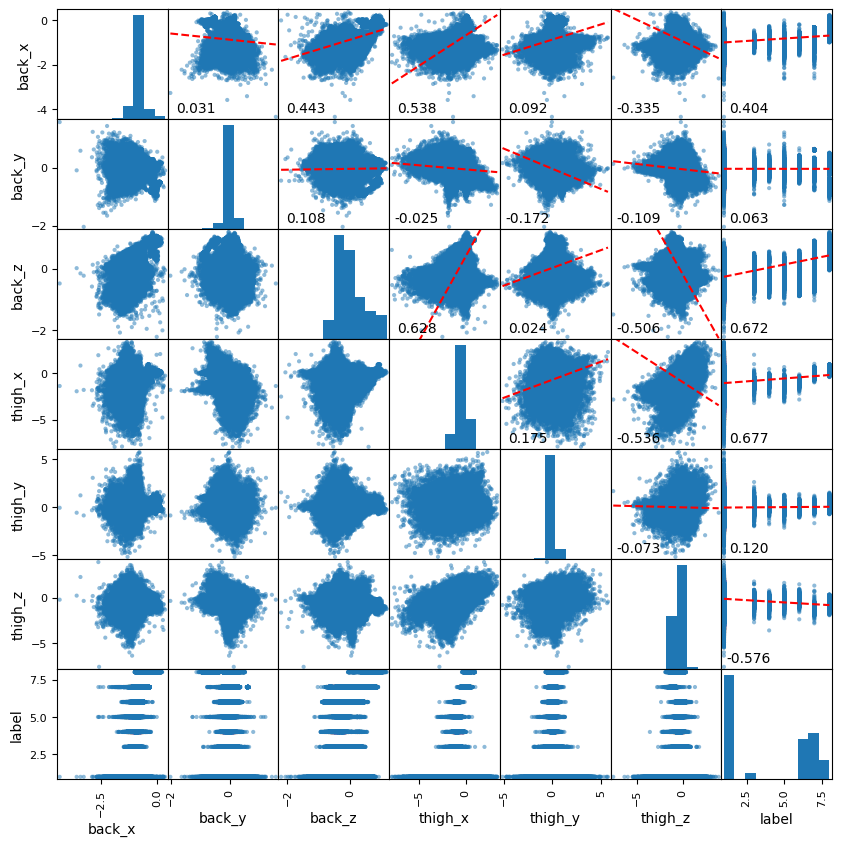

In [12]:
plot_spearman(har70[['back_x', 'back_y', 'back_z', 'thigh_x','thigh_y','thigh_z', 'label']])

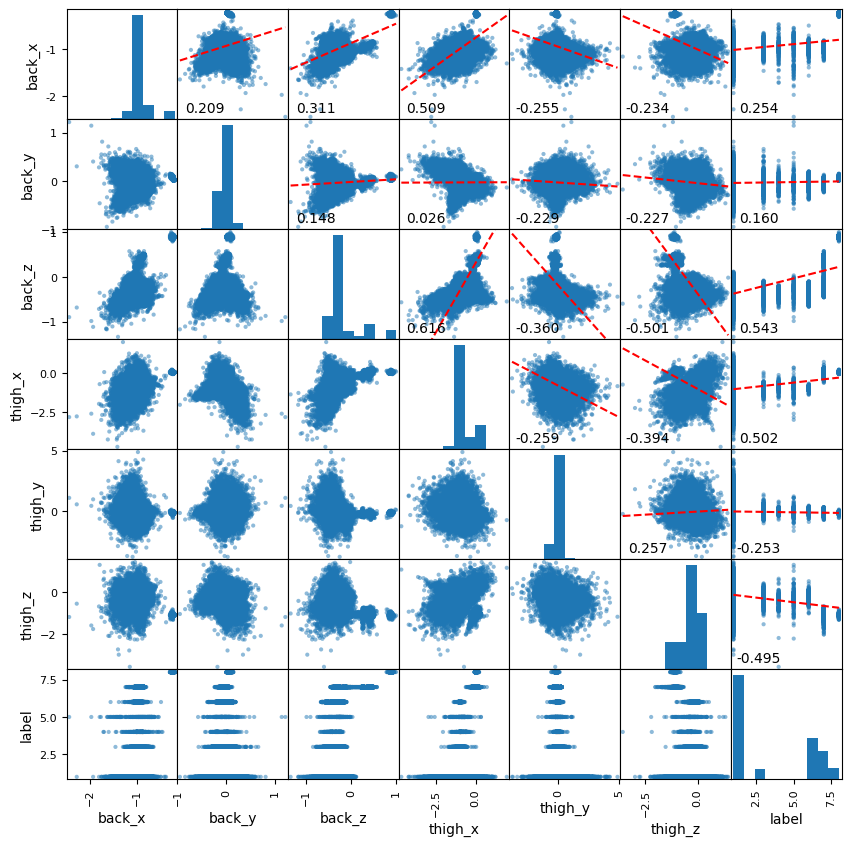

In [13]:
plot_spearman(har70[['back_x', 'back_y', 'back_z', 'thigh_x','thigh_y','thigh_z', 'label']].loc[har70['filename']=='516.csv'])

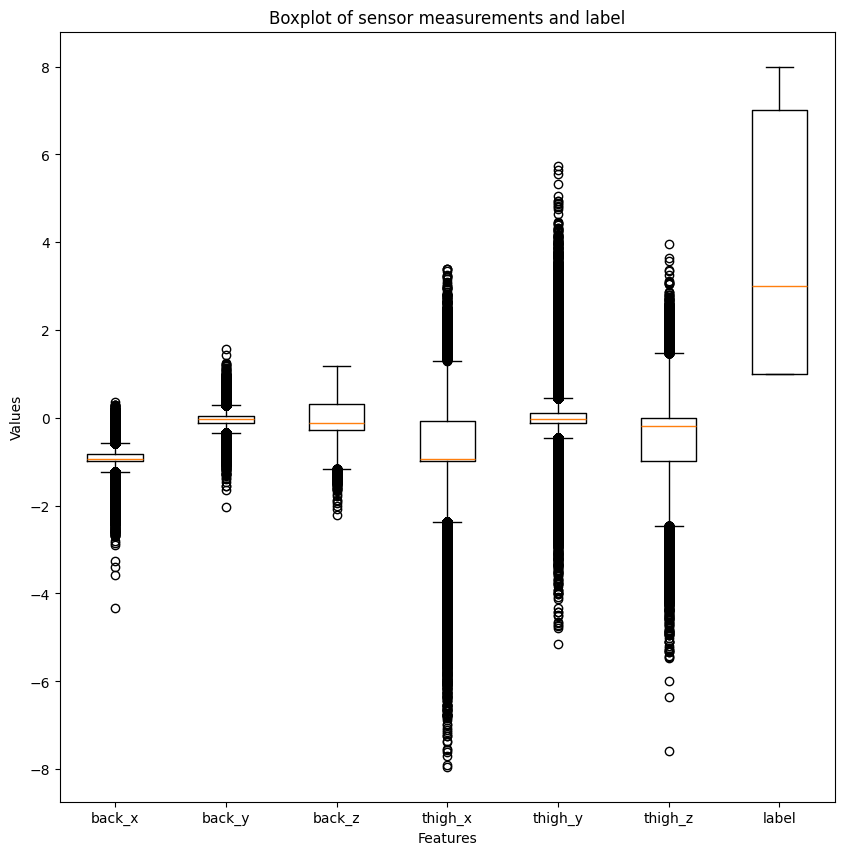

In [14]:
plt.figure(figsize=(10,10))
plt.boxplot(har70[['back_x', 'back_y', 'back_z', 'thigh_x','thigh_y','thigh_z', 'label']].values, tick_labels=har70[['back_x', 'back_y', 'back_z', 'thigh_x','thigh_y','thigh_z', 'label']].columns)
plt.title('Boxplot of sensor measurements and label')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

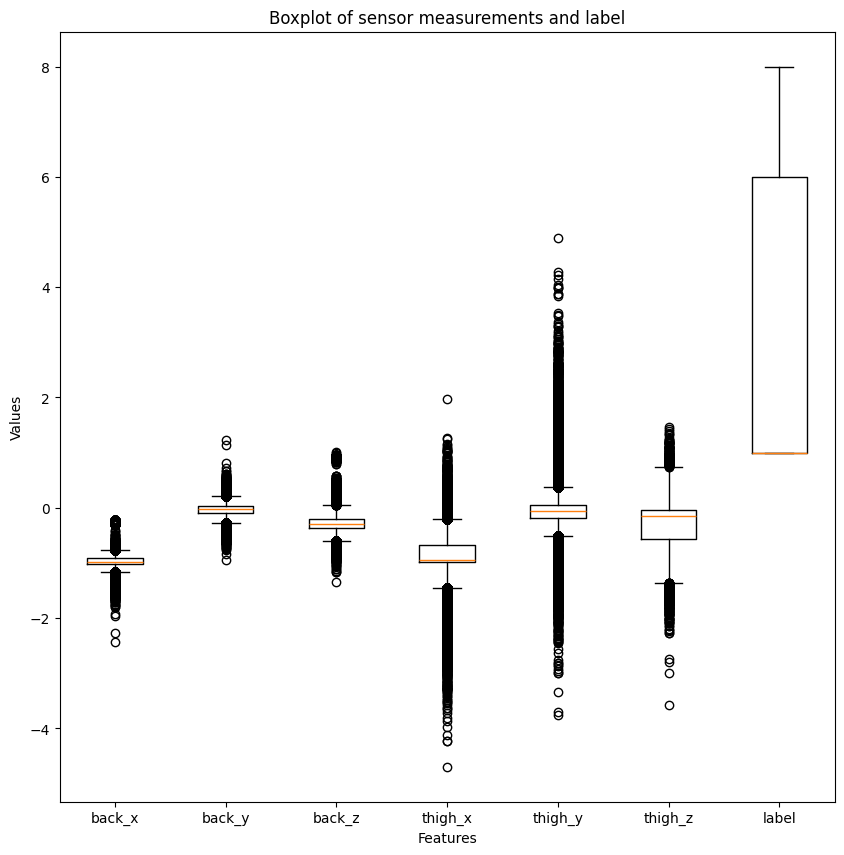

In [15]:
plt.figure(figsize=(10,10))
plt.boxplot(har70[['back_x', 'back_y', 'back_z', 'thigh_x','thigh_y','thigh_z', 'label']].loc[har70['filename']=='516.csv'].values, tick_labels=har70[['back_x', 'back_y', 'back_z', 'thigh_x','thigh_y','thigh_z', 'label']].columns)
plt.title('Boxplot of sensor measurements and label')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

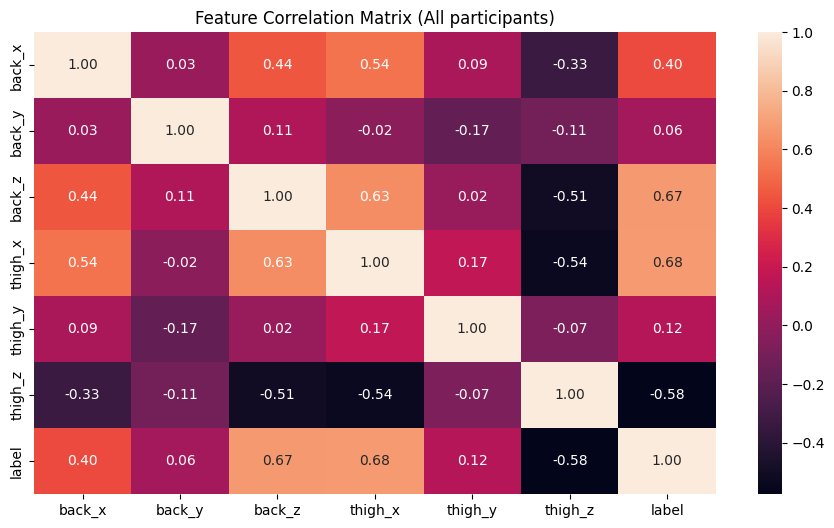

In [16]:
# Correlation matrix
plt.figure(figsize=(11,6))
sns.heatmap(har70[['back_x', 'back_y', 'back_z', 'thigh_x','thigh_y','thigh_z', 'label']].corr(method = 'spearman'), annot=True, fmt='.2f')
plt.title('Feature Correlation Matrix (All participants)')
plt.show()

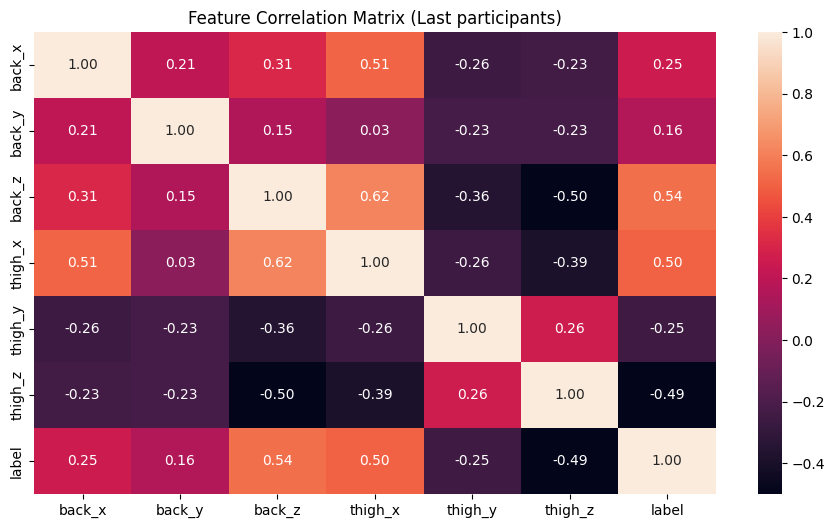

In [17]:
# Correlation matrix
plt.figure(figsize=(11,6))
sns.heatmap(har70[['back_x', 'back_y', 'back_z', 'thigh_x','thigh_y','thigh_z', 'label']].loc[har70['filename']=='516.csv'].corr(method = 'spearman'), annot=True, fmt='.2f')
plt.title('Feature Correlation Matrix (Last participants)')
plt.show()

In [113]:
####################################################################################
#
#   Base Class for the ModelSelector
#
####################################################################################
class ModelSelector:
    def __init__(
        self,
        X,
        y,
        testingSize=0.2,
        randomSeed=42,
        validationSize=0.25,
        selectedModel="LinearRegression",
        selectedColumns = []
):
        '''
        Definition of parameters:
        X: Features
        y: Target column
        testingSize: Float number from 0 to 1 representing the percentage that will be assigned to the testing set
        randomSeed: Value for reproducibility in randomization (Random state)
        validationSize: Float number from 0 tp 1 representing the percentage that will be assigned to the validation set
        selectedModel: Model to be tested by the class.
        selectedColumns: The list of columns used for the analysis. By default it is an empty list that will be replaced by the full list of columns
        '''
        self.model_name = selectedModel
        self.selectedModels = {
            "LinearRegression": {
                "model": lambda X, y: LinearRegression(),
                "fit": lambda X, y: self.selectedModel.fit(X, y)
            },
            "RandomForestClassifier": {
                "model": lambda X, y: RandomForestClassifier(),
                "fit": lambda X, y: self.selectedModel.fit(X, y)
            },
            "DecisionTreeClassifier": {
                "model": lambda X, y: DecisionTreeClassifier(),
                "fit": lambda X, y: self.selectedModel.fit(X, y)
            },
            "GradientBoostingClassifier": {
                "model": lambda X, y: GradientBoostingClassifier(),
                "fit": lambda X, y: self.selectedModel.fit(X, y)
            },
            "AdaBoostClassifier": {
                "model": lambda X, y: AdaBoostClassifier(),
                "fit": lambda X, y: self.selectedModel.fit(X, y)
            },
            "BaggingClassifier": {
                "model": lambda X, y: BaggingClassifier(),
                "fit": lambda X, y: self.selectedModel.fit(X, y)
            },
            "OLS": {
                "model":lambda X, y: sm.OLS(y, X),
                "fit": lambda X, y: self.selectedModel.fit()
            },
            "SVC": {
                "model": lambda X, y: SVC(),
                "fit": lambda X, y: self.selectedModel.fit(X, y)
            },
            "MLPClassifier": {
                "model": lambda X, y: MLPClassifier(),
                "fit": lambda X, y: self.selectedModel.fit(X, y)
            },
            "LogisticRegression":{
                "model": lambda X, y: LogisticRegression(),
                "fit": lambda X, y: self.selectedModel.fit(X, y)
            }
        }
        if(len(selectedColumns)==0):
            selectedColumns = X.columns
        self.selectedColumns = selectedColumns
        self.X = X[selectedColumns]
        self.y = y
        self.testingSize = testingSize
        self.randomSeed = randomSeed
        self.validationSize = validationSize
        #self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
        #    self.X,
        #    self.y,
        #    test_size=self.testingSize,
        #    random_state=self.randomSeed
#)
        self.X_train = X_train[selectedColumns]
        self.y_train = y_train
        self.X_test = X_test[selectedColumns]
        self.y_test = y_test
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            self.X_train,
            self.y_train,
            test_size=self.validationSize,
            random_state=self.randomSeed
)
        self.selectedModel = self.selectedModels[self.model_name]['model'](self.X_train, self.y_train)

    @staticmethod
    def getAvailableModels():
        return [
            #"LinearRegression",
            "RandomForestClassifier",
            "DecisionTreeClassifier",
            "GradientBoostingClassifier",
            #"AdaBoostClassifier",
            "BaggingClassifier",
            #"OLS",
            "SVC",
            "MLPClassifier",
            #"LogisticRegression"
]

    def train(self):
        self.selectedModel=self.selectedModels[self.model_name]['fit'](self.X_train, self.y_train)
        return self.evaluate(self.X_train, self.y_train)

    def predict(self, X):
        return self.selectedModel.predict(X)
    
    def validate(self):
        return self.evaluate(self.X_val, self.y_val)
    
    def test(self):
        return self.evaluate(self.X_test, self.y_test)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        try:
            acc_score = accuracy_score(y, y_pred)
        except Exception as e:
            acc_score = 0
            #print(f'An exception has occurred with model {self.model_name}: {e}')
            #print(y.head())
            #print(y_pred[:5])
        return np.round((mse, mae, r2, acc_score), decimals=2)
    
    def summary(self):
        return self.selectedModel.summary()
    
    def plotResiduals(self, X, y):
        residuals = y - self.predict(X)
        sns.scatterplot(x=self.predict(X), y=residuals)
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title('Predicted Values vs. Residuals')
        plt.show()

    def plot_residuals(self):
        self.plotResiduals(self.X_val, self.y_val)
    
    def plot_residuals_test(self):
        self.plotResiduals(self.X_test, self.y_test)

    def plot_residuals_val(self):
        self.plotResiduals(self.X_val, self.y_val)

In [52]:
har70.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,filename
0,2021-03-24 14:42:03.839,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6,501.csv
1,2021-03-24 14:42:03.859,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6,501.csv
2,2021-03-24 14:42:03.880,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6,501.csv
3,2021-03-24 14:42:03.900,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6,501.csv
4,2021-03-24 14:42:03.920,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6,501.csv


In [107]:
# TODO: Select refine features selections. Currently all features are being considered. 
RANDOM_SEED = 42 # Define our random seed

#Select only the columns that have a higher correlation (above 50%)
selected_columns = ['back_x','back_z','thigh_x','thigh_z','back_y','thigh_y']

#Use these lines to filter on 1 specific file
#X = har70.loc[har70['filename'] == '510.csv', selected_columns] #Assign the selected columns to dataframe X
#y = har70.loc[har70['filename'] == '510.csv', 'label'] #Assign output feature to y dataframe

#Use these lines to use ALL records from all files
X = har70[selected_columns] #Assign the selected columns to dataframe X
y = har70['label'] #Assign output feature to y dataframe


# Splits the data into training/test sets
X_train, X_test, y_train, y_test = train_test_split(X,                          # Features variables
                                                    y,                          # Target variable
                                                    test_size=0.25,             # 25% of the data for test 
                                                    random_state=RANDOM_SEED)   # Set random seed

In [109]:
X.shape

(2259597, 6)

In [99]:
# Collect the data into a list of lists
resultsData = [['Model',
         'Train MSE',
         'Train MAE',
         'Train R²',
         'Train Accuracy',
         'Validation MSE',
         'Validation MAE',
         'Validation R²',
         'Validation Accuracy',
         'Test MSE',
         'Test MAE',
         'Test R²',
         'Test Accuracy'
]]

for modelName in ModelSelector.getAvailableModels():
    #currentModel = ModelSelector(X, y, selectedModel=modelName)
    currentModel = ModelSelector(X_train, y_train, selectedModel=modelName, selectedColumns=selected_columns)
    trainingResults = currentModel.train()
    validationResults = currentModel.validate()
    testingResults = currentModel.test()
    
    # Append each row of model results to the data list
    resultsData.append([modelName,
                 f'{trainingResults[0]:.4f}', f'{trainingResults[1]:.4f}', f'{trainingResults[2]:.4f}', f'{trainingResults[3]:.4f}', 
                 f'{validationResults[0]:.4f}', f'{validationResults[1]:.4f}', f'{validationResults[2]:.4f}', f'{validationResults[3]:.4f}',
                 f'{testingResults[0]:.4f}', f'{testingResults[1]:.4f}', f'{testingResults[2]:.4f}', f'{testingResults[3]:.4f}'])

#Printing the data
dfResultsData = pd.DataFrame(resultsData)

# Print DataFrame as an HTML table
html_ResultsData = dfResultsData.to_html()
display(HTML(html_ResultsData))


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Model,Train MSE,Train MAE,Train R²,Train Accuracy,Validation MSE,Validation MAE,Validation R²,Validation Accuracy,Test MSE,Test MAE,Test R²,Test Accuracy
1,RandomForestClassifier,0.0000,0.0000,1.0000,1.0000,0.3100,0.0800,0.9600,0.9700,0.3300,0.0900,0.9600,0.9700
2,DecisionTreeClassifier,0.0000,0.0000,1.0000,1.0000,0.5000,0.1400,0.9400,0.9600,0.5200,0.1400,0.9400,0.9600
3,GradientBoostingClassifier,0.3700,0.1000,0.9500,0.9700,0.4200,0.1100,0.9500,0.9700,0.4400,0.1100,0.9500,0.9700
4,AdaBoostClassifier,3.1900,0.7400,0.6100,0.7600,3.1600,0.7300,0.6200,0.7600,3.2000,0.7400,0.6100,0.7600
5,BaggingClassifier,0.0300,0.0100,1.0000,1.0000,0.3300,0.0900,0.9600,0.9700,0.3600,0.1000,0.9600,0.9700
6,SVC,0.6900,0.1600,0.9200,0.9600,0.6400,0.1500,0.9200,0.9600,0.6900,0.1600,0.9200,0.9600
7,MLPClassifier,0.4500,0.1200,0.9400,0.9700,0.4700,0.1200,0.9400,0.9700,0.4700,0.1200,0.9400,0.9600
8,LogisticRegression,2.2100,0.4700,0.7300,0.8900,2.1600,0.4600,0.7400,0.9000,2.2300,0.4700,0.7300,0.8900


In [80]:
# create a function for our confusion matrix 
def plot_confusion_matrix(_true, _pred, classes, cmap='Blues', title=''):
    cm = confusion_matrix(_true, _pred) # set our confusion matrix true and predicted values

    # display our confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=cmap)
    plt.title(title)
    plt.show()

Accuracy: 0.9362913790051337


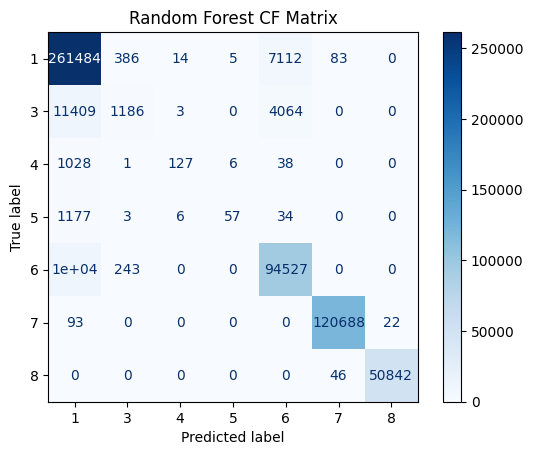

In [111]:
# Instantiate and train the Random Forest model
rf_model = RandomForestClassifier(random_state=RANDOM_SEED)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_prediction = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_prediction)
print(f'Accuracy: {rf_accuracy}')

# Calculate F1 score
rf_weighted_f1 = f1_score(y_test, rf_prediction, average='weighted')

# call confusion matrix function 
plot_confusion_matrix(y_test, rf_prediction, rf_model.classes_, title='Random Forest CF Matrix')

In [119]:
rf_prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)